In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.learning_curve import learning_curve

df = pd.read_csv('data2.csv', parse_dates = ['TradeTime'])

df = df.drop(df[df['renovation condition'] == '0'].index)
df = df.drop(df[df['renovation condition'] == '1'].index)
df.reset_index()

renovation_type = sorted(df['renovation condition'].dropna().unique())
df['renovation condition'] = df['renovation condition'].astype("category", categories = renovation_type).cat.codes

df['renovation condition'].unique()

df = df.drop(['URL', 'ID', 'CommunityID', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'], axis = 1)

df = df.rename(columns = {'楼': 'Floor', 'Ladder ratio(梯户比)': 'Ladder ratio', 'Property rights for five years（房屋满五年）':'Property rights for five years'})

df = df.drop(df[df['Floor'] == '混合结构'].index)
df = df.drop(df[df['Floor'] == '钢混结构'].index)
df.reset_index()

floor = []
number = []
for i in range(len(df)):
        s = df.iloc[i]['Floor'].split(' ')
        floor.append(s[0])
        number.append(s[1])

for i in range(len(floor)):
    if floor[i] == '高':
        floor[i] = 3
    if floor[i] == '中':
        floor[i] = 2
    if floor[i] == '低':
        floor[i] = 1
    if floor[i] == '底':
        floor[i] = 0
    if floor[i] == '顶':
        floor[i] = 4
    if floor[i] == '未知':
        floor[i] = None
    
df = df.drop('Floor', axis = 1)
df['Floor'] = floor
df['Number of floor'] = number

building_type = sorted(df['Building Type'].dropna().unique())
df['Building Type'] = df['Building Type'].astype("category", categories = building_type).cat.codes

df['Building Type'] = df['Building Type'].replace(-1, None)

# replace na with mode
mode = df.loc[:, 'Building Type'].mode()[0]
df.loc[:, 'Building Type'] = df.loc[:, 'Building Type'].fillna(mode)

df['building structure'] = df['building structure'].replace('未知', None)
structure_type = df['building structure'].dropna().unique()
df['building structure'] = df['building structure'].astype("category", categories = structure_type).cat.codes
df['building structure'] = df['building structure'].replace(-1, None)

district_type = df['District'].dropna().unique()
df['District'] = df['District'].astype("category", categories = district_type).cat.codes
df['District'] = df['District'].replace(-1, None)

df['TradeTime'] = pd.to_datetime(df['TradeTime'])

df = df[(df['TradeTime'] > '2017-1-1') & (df['Price'] > 5000)]


# delet na in floor
df = df.drop(df[df['Floor'].isnull()].index )

# delet na in Community average
df = df.drop(df[df['Community average'].isnull()].index )

# fill NA data with mode
mode = df.loc[:, 'DOM'].mode()[0]
df.loc[:, 'DOM'] = df.loc[:, 'DOM'].fillna(mode)

df.reset_index()

# convert construction time
df['Construction time'] = df['Construction time'].replace('未知', None)
mode = df.loc[:, 'Construction time'].mode()[0]
df.loc[:, 'Construction time'] = df.loc[:, 'Construction time'].fillna(mode)
time_of_construction = []
for i in range(len(df)):
    time_of_construction.append( df.iloc[i]['TradeTime'].year - int(df.iloc[i]['Construction time']) )

df['TimeOfConstruction'] = time_of_construction

df.reset_index()

/Users/jy33247/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jy33247/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/Users/jy33247/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,11,12,13,14,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Us

,index,Lng,Lat,TradeTime,DOM,Followers,Total price,Price,Square,Living Room,...,building structure,Ladder ratio,Elevator,Property rights for five years,Subway,District,Community average,Floor,Number of floor,TimeOfConstruction
0,58,116.284755,39.934530,2017-03-22,721.0,117,280.0,67470,41.50,1,...,0,0.111,1.0,0.0,1.0,6,70141.0,4.0,19,8
1,60,116.559275,40.113935,2017-01-22,659.0,81,530.0,26100,203.07,6,...,0,0.500,0.0,1.0,0.0,3,42336.0,3.0,6,19
2,88,116.606151,40.051276,2017-01-22,629.0,172,300.0,29127,103.00,3,...,1,0.500,0.0,1.0,0.0,0,38468.0,4.0,6,19
3,135,116.199293,39.938056,2017-03-09,637.0,198,391.0,39692,98.51,3,...,1,0.333,0.0,1.0,0.0,10,42325.0,2.0,6,21
4,159,116.308505,39.839489,2017-04-13,651.0,93,840.0,56900,147.63,3,...,0,0.214,1.0,1.0,1.0,5,57372.0,1.0,30,16
5,167,116.434166,39.948115,2017-01-05,548.0,56,2200.0,72132,305.00,3,...,0,0.750,1.0,0.0,1.0,2,67987.0,1.0,12,9
6,219,116.432151,39.905567,2017-01-11,520.0,181,1100.0,57046,192.83,3,...,0,1.000,1.0,1.0,1.0,2,78508.0,2.0,16,18
7,226,116.559953,40.117154,2017-03-05,571.0,51,150.0,30688,48.88,1,...,0,0.130,1.0,0.0,1.0,3,54715.0,3.0,7,4
8,235,116.481447,39.937145,2017-01-15,515.0,106,890.0,54269,164.00,3,...,0,0.273,1.0,0.0,1.0,0,66938.0,2.0,22,15
9,241,116.387037,39.959170,2017-01-07,505.0,233,644.0,126250,51.01,1,...,0,0.333,0.0,0.0,1.0,4,119449.0,4.0,6,14


In [2]:
df['TradeTime']=pd.to_datetime(df['TradeTime'],format='%Y%m%d')

In [3]:
df = df.set_index('TradeTime')

In [4]:
df.head()

,Lng,Lat,DOM,Followers,Total price,Price,Square,Living Room,Drawing room,Kitchen,...,building structure,Ladder ratio,Elevator,Property rights for five years,Subway,District,Community average,Floor,Number of floor,TimeOfConstruction
TradeTime,,,,,,,,,,,,,,,,,,,,,
2017-03-22,116.284755,39.934530,721.0,117,280.0,67470,41.50,1,0,1,...,0,0.111,1.0,0.0,1.0,6,70141.0,4.0,19,8
2017-01-22,116.559275,40.113935,659.0,81,530.0,26100,203.07,6,2,1,...,0,0.500,0.0,1.0,0.0,3,42336.0,3.0,6,19
2017-01-22,116.606151,40.051276,629.0,172,300.0,29127,103.00,3,1,1,...,1,0.500,0.0,1.0,0.0,0,38468.0,4.0,6,19
2017-03-09,116.199293,39.938056,637.0,198,391.0,39692,98.51,3,1,1,...,1,0.333,0.0,1.0,0.0,10,42325.0,2.0,6,21
2017-04-13,116.308505,39.839489,651.0,93,840.0,56900,147.63,3,2,1,...,0,0.214,1.0,1.0,1.0,5,57372.0,1.0,30,16


In [5]:
df.groupby(df.index.month)['Price'].count()

TradeTime
1     4543
2     7535
3     8596
4     2059
5     1553
6     1737
7     2416
8     2577
9     3159
10    2627
11    3013
12    3494
Name: Price, dtype: int64

In [6]:
df = df.reset_index()

In [7]:
df.dtypes

TradeTime                         datetime64[ns]
Lng                                      float64
Lat                                      float64
DOM                                      float64
Followers                                  int64
Total price                              float64
Price                                      int64
Square                                   float64
Living Room                               object
Drawing room                              object
Kitchen                                   object
Bathroom                                  object
Building Type                               int8
Construction time                         object
renovation condition                        int8
building structure                          int8
Ladder ratio                             float64
Elevator                                 float64
Property rights for five years           float64
Subway                                   float64
District            

In [8]:
df['Number of floor']=df['Number of floor'].astype(str).astype(int)

In [9]:
new_df = df.drop('Community average',axis=1)

In [10]:
new_df = new_df.drop('Total price',axis=1)

In [11]:
new_df = new_df.drop('TradeTime',axis=1)

In [12]:
def RF_model(data):
    # build the correclation matrix
    
    matrix = data.corr()
    sns.heatmap(matrix, vmax=0.7, square=True)
    interesting_variables = matrix['Price'].sort_values(ascending=False)
    print(interesting_variables)
    # set X and y
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    
    # split train dataset and test dataset, and build the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
    model = RandomForestRegressor(n_estimators=300, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Build a plot
    plt.figure(figsize = (40,20))
    plt.plot(range(len(y_pred)),y_pred,'b',label = 'predict')
    # plt.plot(range(len(y_pred)),y_test,'r',label = 'test')
    plt.scatter(range(len(y_pred)), y_test, color = 'r', alpha=0.5)
    plt.legend(loc='upper right')
    plt.xlabel('The indexes of test set')
    plt.ylabel('Value of results')
    plt.title('Compare of predict value and test value')
    plt.show()

    print('MAE:', mean_absolute_error(y_test,y_pred))
    print('MSE:', mean_squared_error(y_test,y_pred))
    print('Coefficient of determination is',r2_score(y_test,y_pred))
    print('Regressor score',model.score(X_train,y_train))
    # receiver operating characteristic curve  

In [13]:
lst = []
for i in list(new_df.columns):
    if i != 'Price':
        lst.append(i)
    else:
        last = 'Price'
lst.append(last)
lst

['Lng',
 'Lat',
 'DOM',
 'Followers',
 'Square',
 'Living Room',
 'Drawing room',
 'Kitchen',
 'Bathroom',
 'Building Type',
 'Construction time',
 'renovation condition',
 'building structure',
 'Ladder ratio',
 'Elevator',
 'Property rights for five years',
 'Subway',
 'District',
 'Floor',
 'Number of floor',
 'TimeOfConstruction',
 'Price']

In [14]:
new_df = new_df[lst]
new_df.head()

,Lng,Lat,DOM,Followers,Square,Living Room,Drawing room,Kitchen,Bathroom,Building Type,...,building structure,Ladder ratio,Elevator,Property rights for five years,Subway,District,Floor,Number of floor,TimeOfConstruction,Price
0,116.284755,39.934530,721.0,117,41.50,1,0,1,1,0,...,0,0.111,1.0,0.0,1.0,6,4.0,19,8,67470
1,116.559275,40.113935,659.0,81,203.07,6,2,1,2,3,...,0,0.500,0.0,1.0,0.0,3,3.0,6,19,26100
2,116.606151,40.051276,629.0,172,103.00,3,1,1,1,3,...,1,0.500,0.0,1.0,0.0,0,4.0,6,19,29127
3,116.199293,39.938056,637.0,198,98.51,3,1,1,1,3,...,1,0.333,0.0,1.0,0.0,10,2.0,6,21,39692
4,116.308505,39.839489,651.0,93,147.63,3,2,1,2,0,...,0,0.214,1.0,1.0,1.0,5,1.0,30,16,56900


Price                             1.000000
Subway                            0.325303
TimeOfConstruction                0.321401
Elevator                          0.055200
Property rights for five years    0.023911
building structure                0.010700
Ladder ratio                      0.000345
Number of floor                  -0.004576
renovation condition             -0.020533
DOM                              -0.029135
Floor                            -0.031168
Lat                              -0.065319
Followers                        -0.065979
Building Type                    -0.079890
District                         -0.080658
Lng                              -0.098364
Square                           -0.211715
Name: Price, dtype: float64


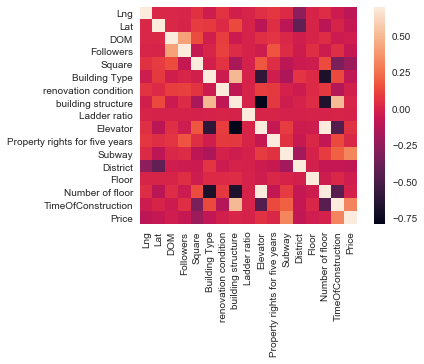

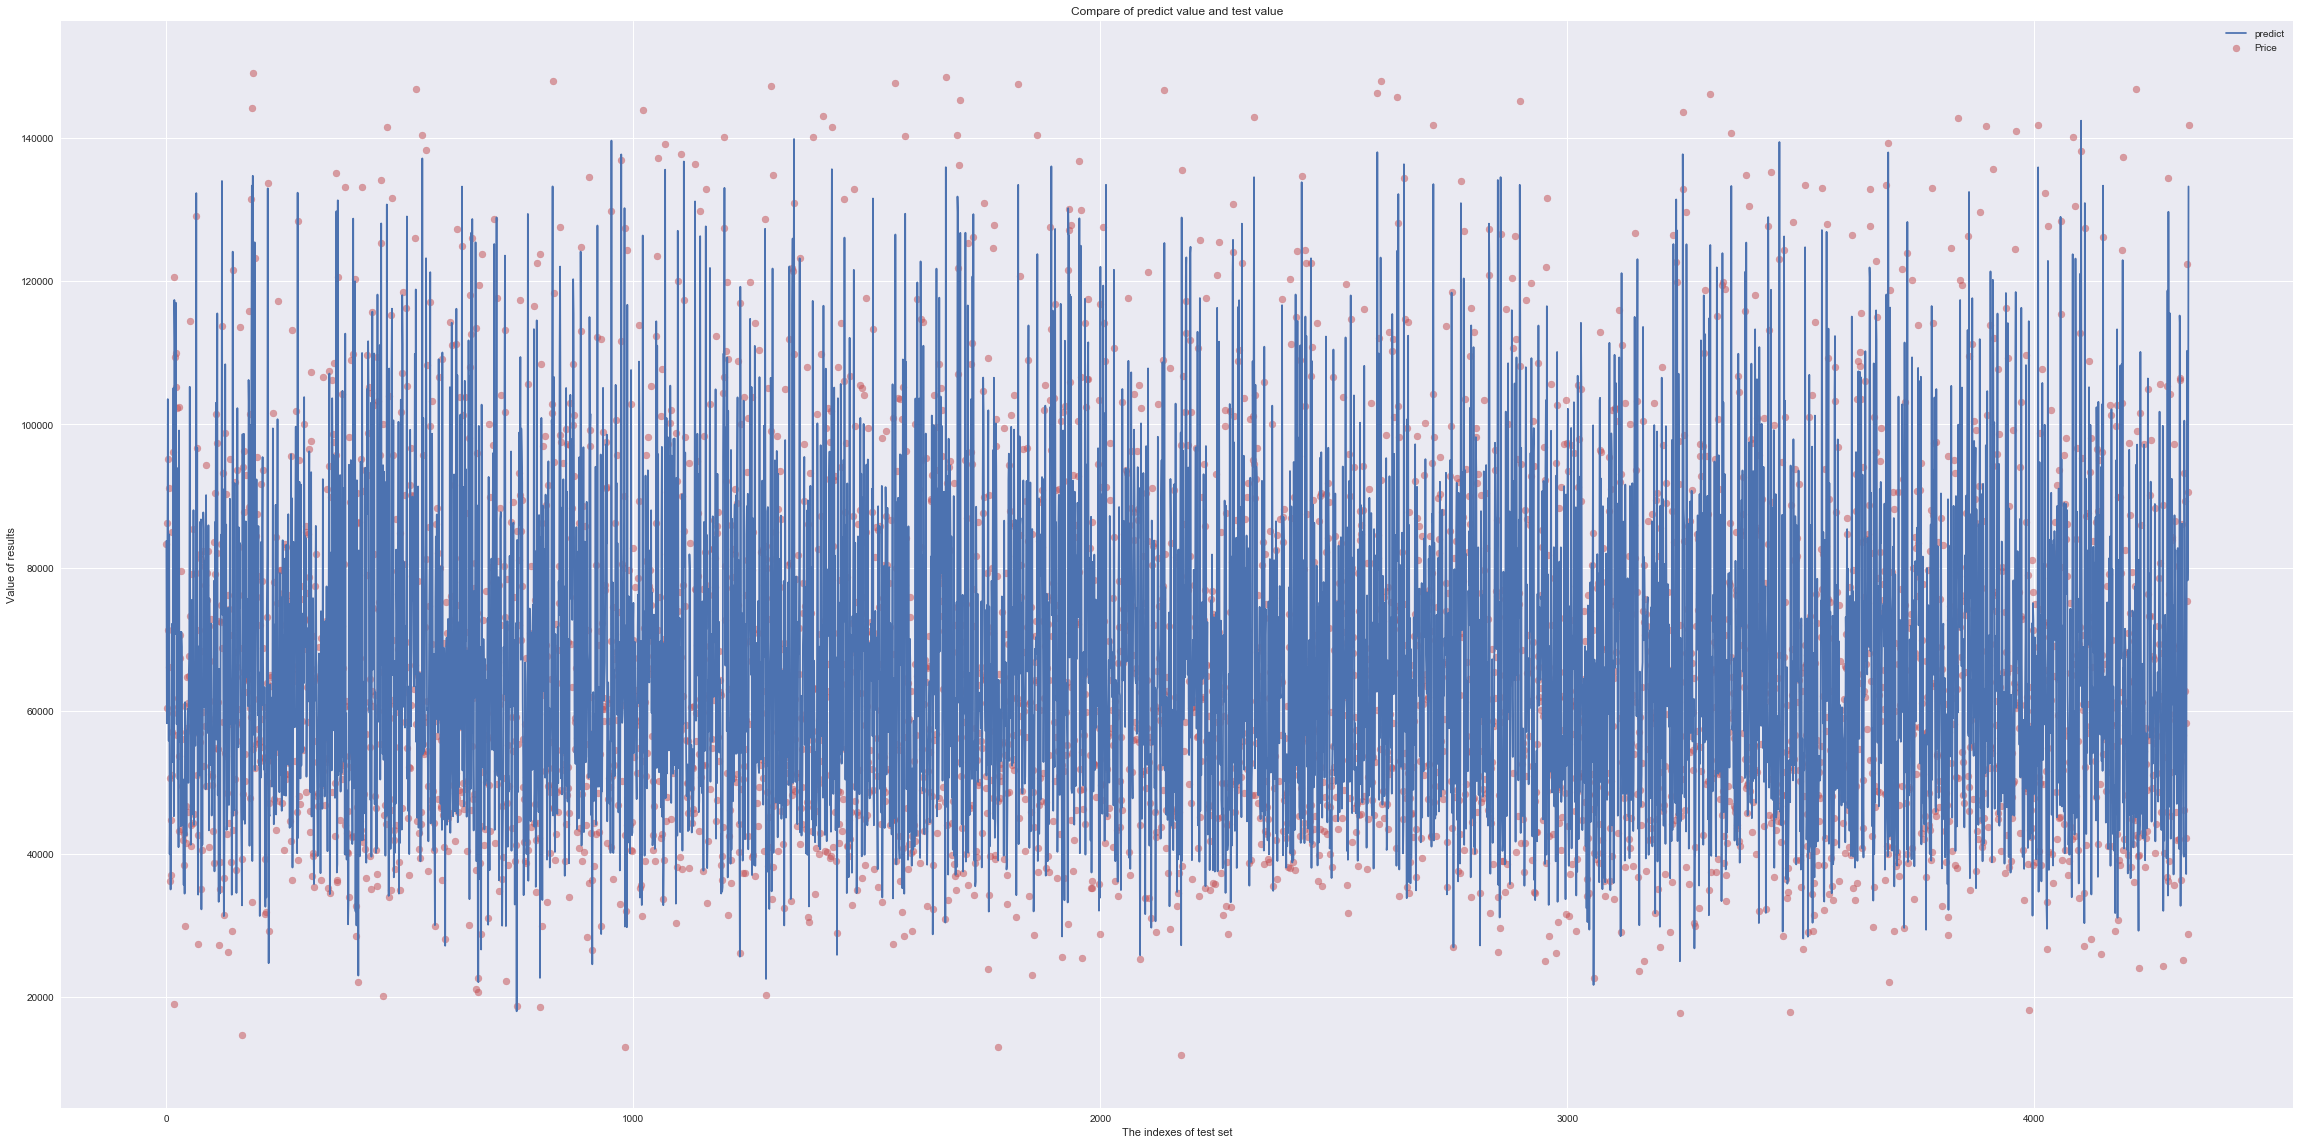

MAE: 5415.2056159470485
MSE: 68915042.35802126
Coefficient of determination is 0.8825082125928365
Regressor score 0.98683604680732


In [15]:
RF_model(new_df)